> R base plot, R基础绘图，R原生绘图，graphics 包

ref:
- [R ‘graphics’官方教程](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html)
- [高级绘图函数](https://www.cnblogs.com/chance88/p/4908394.html)， [实例](https://www.cnblogs.com/focusonepoint/p/6647973.html)
- [绘图参数及par函数](https://blog.csdn.net/weixin_54000907/article/details/114482044)
- [坐标轴设置](https://blog.csdn.net/weixin_40628687/article/details/79254791)

# R高级绘图函数

## hist()

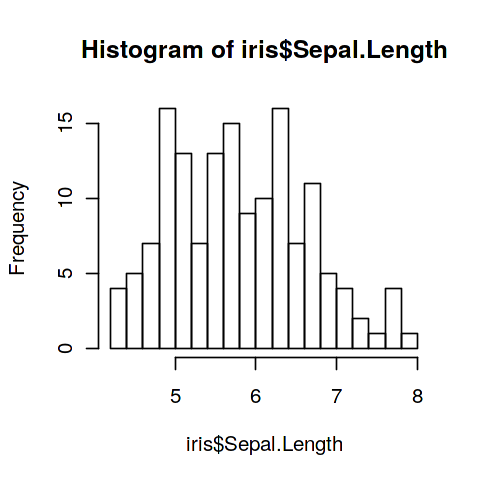

In [73]:
options(repr.plot.width=4, repr.plot.height=4)
hist(iris$Sepal.Length, n=20)

## boxplot()

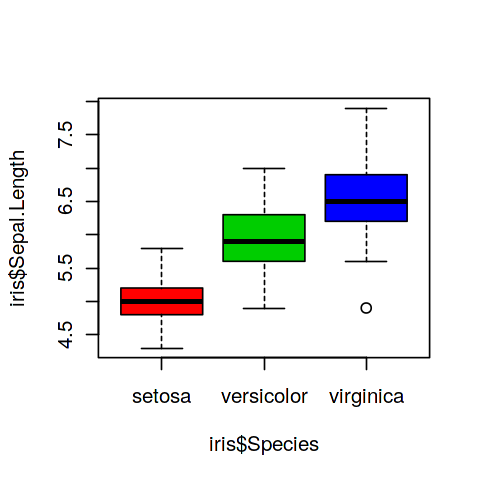

In [2]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(iris$Sepal.Length~iris$Species, col=c(2,3,4))

### 带凹槽

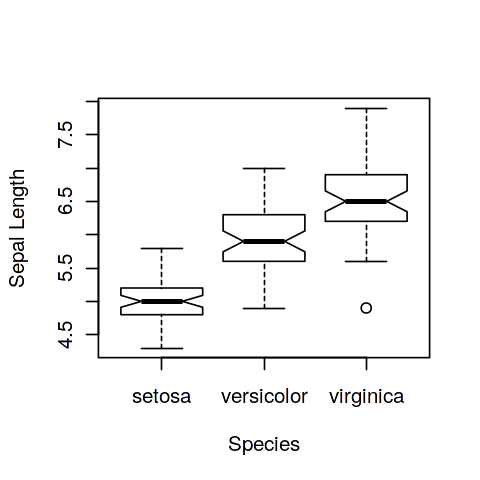

In [3]:
# 显示凹槽
options(repr.plot.width=4, repr.plot.height=4)

boxplot(iris$Sepal.Length~iris$Species, 
       notch=T, xlab="Species", ylab="Sepal Length")

## barplot()

http://www.360doc.com/content/19/0417/15/52645714_829424953.shtml

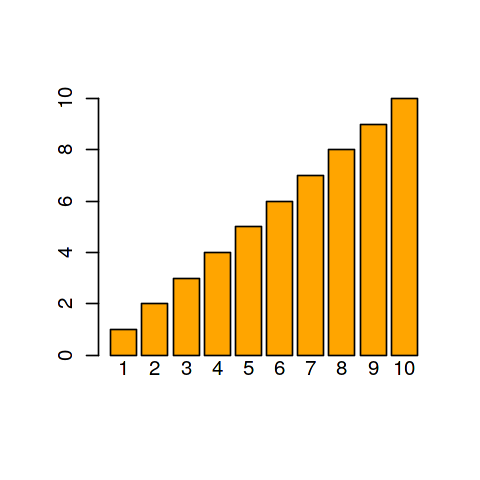

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
posX=barplot( seq(1:10), col="orange")

text(posX, -0.5, 1:10, xpd=T)

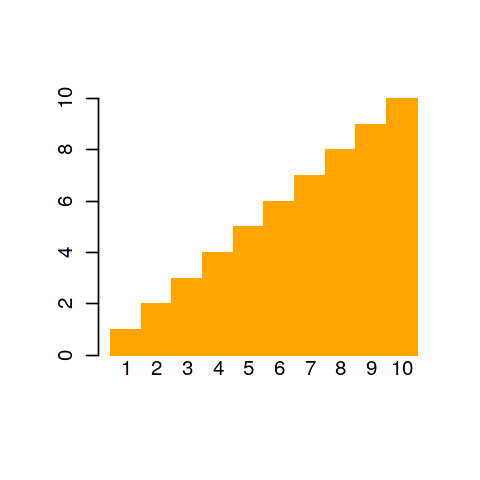

In [5]:
# 不要间隙
options(repr.plot.width=4, repr.plot.height=4)
posX=barplot( seq(1:10), col="orange", 
            border=NA, #不要描边
             space=0) #不要距离
text(posX, -0.5, 1:10, xpd=T)

## stripchart()

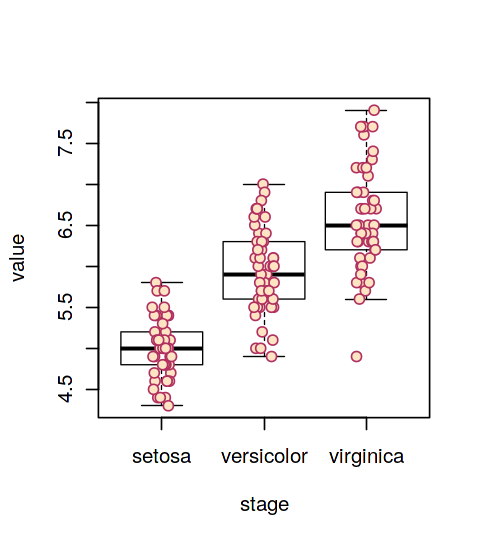

In [6]:
options(repr.plot.width=4, repr.plot.height=4.5)

data=data.frame(
    value=iris$Sepal.Length,
    stage=iris$Species
)

#par(mar = c(3,3,2,1))

#http://r.789695.n4.nabble.com/overlap-dot-plots-with-box-plots-td2134530.html
boxplot(value ~ stage, data, outpch = NA, lwd=0.8) 
# (Setting 'outpch = NA' avoids plotting outliers.) 
stripchart(value ~ stage, data, 
           vertical = TRUE, method = "jitter", 
           pch = 21, col = "maroon", bg = "bisque", 
           add = TRUE)

## pieplot()

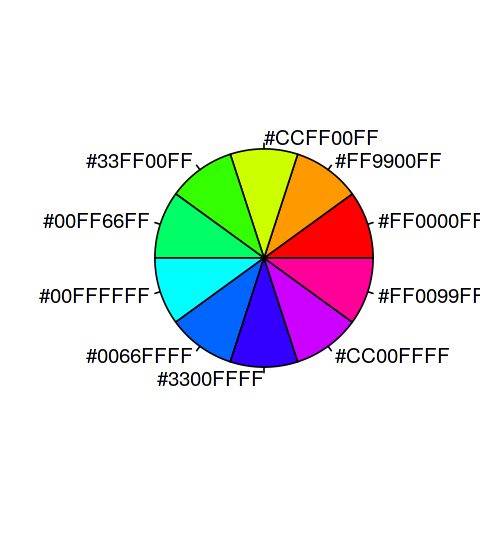

In [7]:
options(repr.plot.width=4, repr.plot.height=4.5)

n=10
mycolors<-rainbow(n)
pie(rep(1,n),labels=mycolors,col=mycolors)

## 函数图形

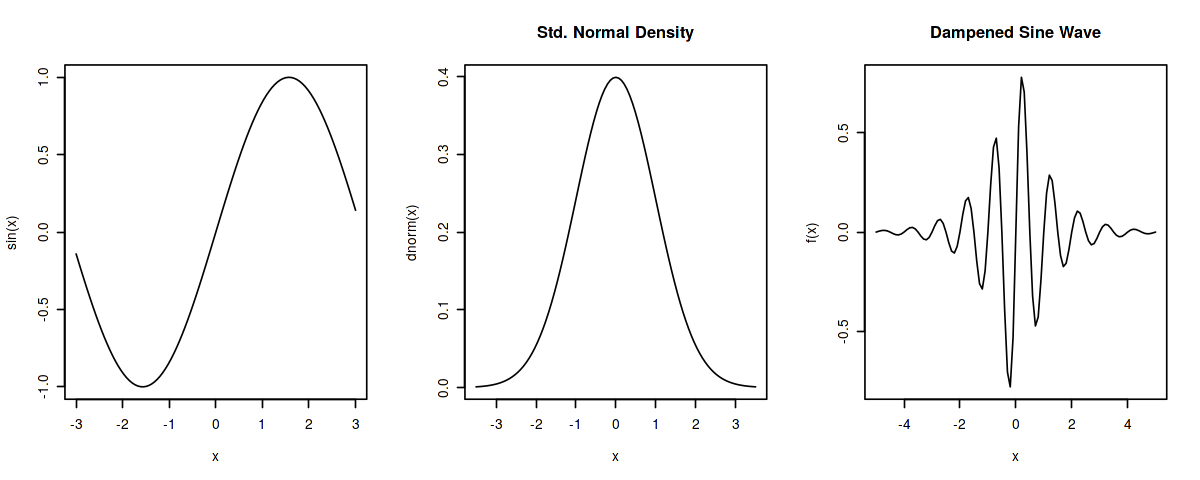

In [8]:
options(repr.plot.width=10, repr.plot.height=4)

par(mfrow=c(1,3))

curve(sin,-3,+3)

curve(dnorm,-3.5,+3.5,main="Std. Normal Density")#显示了标准正太密度函数的图

f<-function(x){
    exp(-abs(x))*sin(2*pi*x)
}
curve(f,-5,+5,main="Dampened Sine Wave")

# R低级作图函数

## 画点 points(x,y, pch)

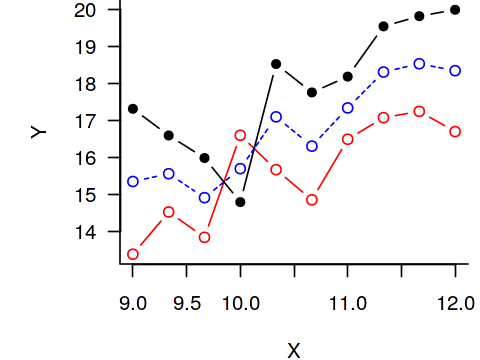

In [9]:
options(repr.plot.width=4, repr.plot.height=3)

# plot two series of random data
opar<-par(mar=c(4,5,0,0.5))

set.seed(1)
X<-seq(9,12,l=10)
Y1<-(1*X+2)+rnorm(10,3,1)
Y2<-(1.2*X+2)+rnorm(10,3,1)
Y3<- (Y1+Y2)/2

plot(c(Y1,Y2)~c(X,X),type="n",axes=T, ann=F, bty="l", las=1)
title(xlab="X", ylab="Y" )

points(Y1~X,pch=21, type="b", col="red")
points(X,Y2, pch=16, type="b")

lines(X, Y3, type="b", lty=2, col="blue")

par(opar)

## grid() 坐标系网格

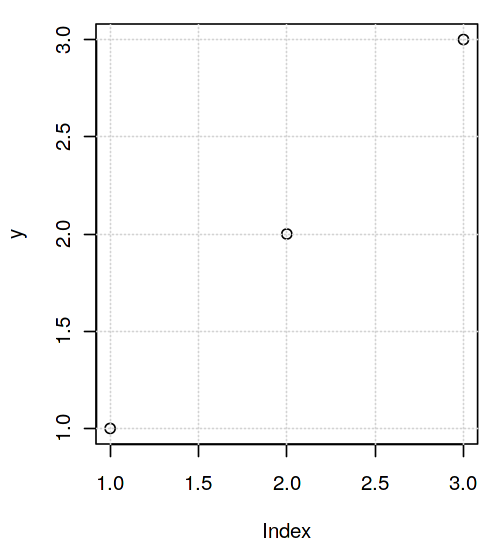

In [10]:
options(repr.plot.width=4, repr.plot.height=4.5)

par(mar=c(4,4,1,0.1)) #bottom,l,t,r, 
plot(1:3, ylab="y")

grid()

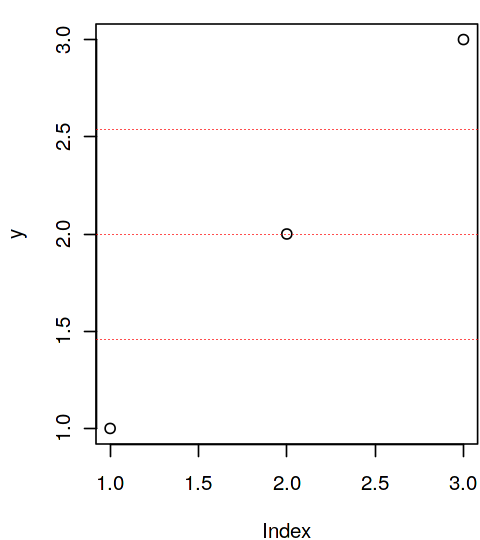

In [11]:
options(repr.plot.width=4, repr.plot.height=4.5)

par(mar=c(4,4,1,0.1)) #bottom,l,t,r, 
plot(1:3, ylab="y", ylim=c(1,3))

grid(nx=NA,  #不需要x轴栅格
     ny=4, lwd=0.5, col='red')

### panel.first和panel.last用于设置网格

调用panel.first时，网格会先于图形绘制，故网格在图形之下；

调用panel.last时，网格会后于图形绘制，故网格在图形之上。

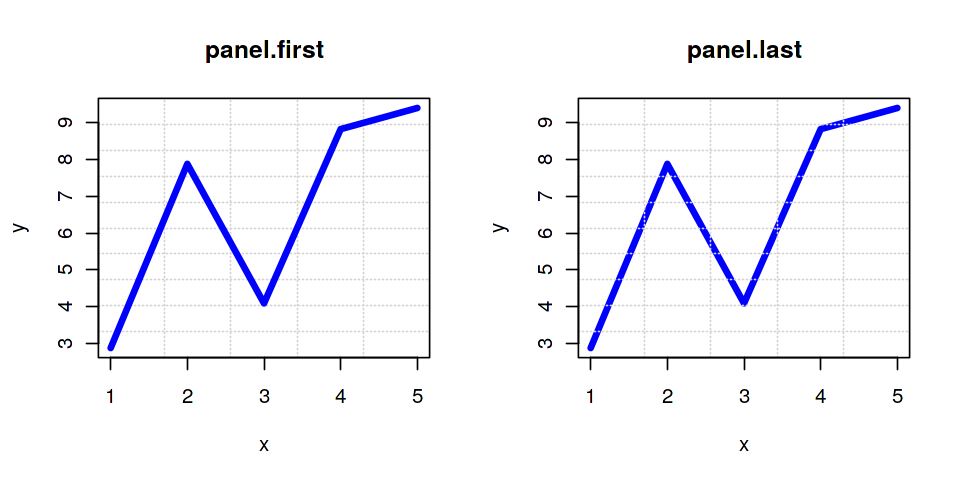

In [12]:
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow=c(1,2))
set.seed(123)
x<-c(1:5)
y<-runif(5, 0, 10)
x2<-cbind(x, y)
 
plot(x2, type = "l", panel.first = grid(5, 10),
     pch = 0, lwd = 4, col = "blue",
     main = "panel.first")
 
plot(x2, type = "l", panel.last = grid(5, 10),
     pch = 0, lwd = 4, col = "blue",
     main = "panel.last")

## segments() 画线段

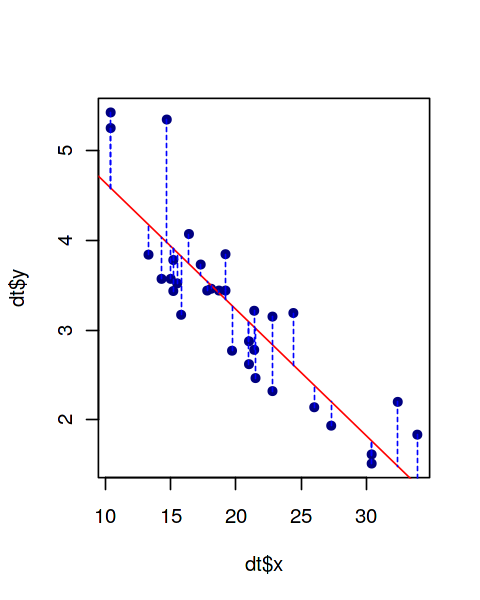

In [13]:
options(repr.plot.width=4, repr.plot.height=5)

dt=data.frame(
    x=mtcars$mpg,
    y=mtcars$wt
)
plot(dt$x, dt$y, type="p", pch=16, col='navy')
#
dt.lm=lm(y~x, data=dt)
abline(dt.lm, col='red')
#
with(dt, segments(x, y, x, predict(dt.lm), lty=2, col="blue"))

## polygon() 绘多边形

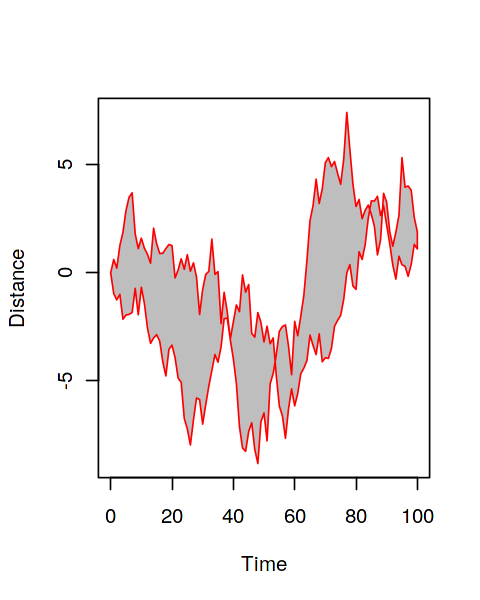

In [14]:
options(repr.plot.width=4, repr.plot.height=5)

set.seed(3)
# Distance Between Brownian Motions 布朗运动之间的距离
n <- 100
xx <- c(0:n, n:0)   #生成202个元素的向量，其中前面101与后面101横坐标对称
yy <- c(c(0, cumsum(rnorm(n))), rev(c(0, cumsum(stats::rnorm(n)))))

plot(xx, yy, type = "n", xlab = "Time", ylab = "Distance")
polygon(xx, yy, col = "gray", border = "red")

### 指定区域填充背景色

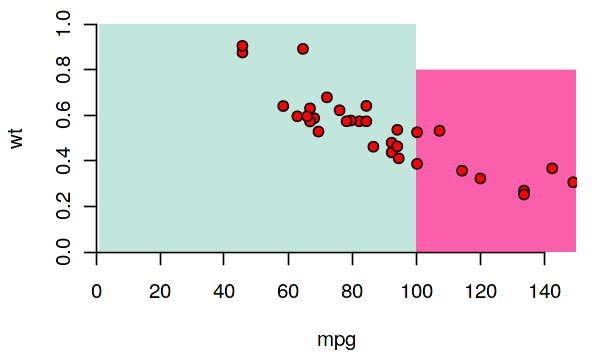

In [15]:
options(repr.plot.width=5, repr.plot.height=3)

par(mar=c(4.5,4,1,1))
xx=c(1:100, 100:1)
yy=c(rep(0,100), rep(1,100) )
plot(xx, yy, type = "n", bty="n",
     xaxs ='i',  #图和轴之间无空隙
     yaxs ='i', 
     xlim=c(0,150),
     xlab = "mpg", ylab = "wt")

polygon(xx, yy, col = "#66C2A566", border = NA) #填充bg1

polygon( c(100:150, 150:100), c(rep(0, 51), rep(0.8,51)), #填充bg2
         col = "#F81082AA", border = NA)
# 
points(mtcars$mpg*4.4, mtcars$wt/6, col="black", pch=21, bg="red")

# 作图参数

In [16]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


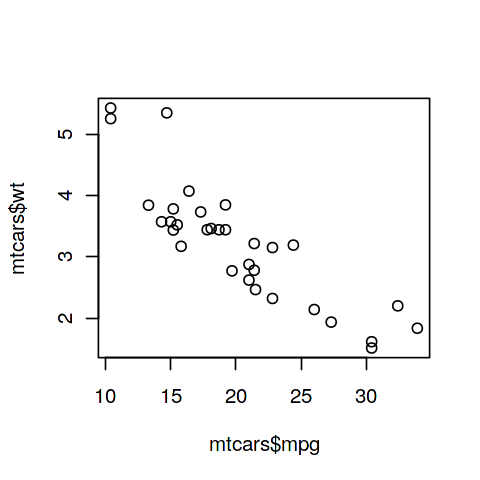

In [17]:
options(repr.plot.width=4, repr.plot.height=4)

plot(mtcars$mpg, mtcars$wt)

## type="p" 点图类型(9种)

what type of plot should be drawn. Possible types are

    "p" for points,
    "l" for lines,
    "b" for both,
    "c" for the lines part alone of "b",
    "o" for both ‘overplotted’,
    "h" for ‘histogram’ like (or ‘high-density’) vertical lines,
    "s" for stair steps,
    "S" for other steps, see ‘Details’ below,
    "n" for no plotting.

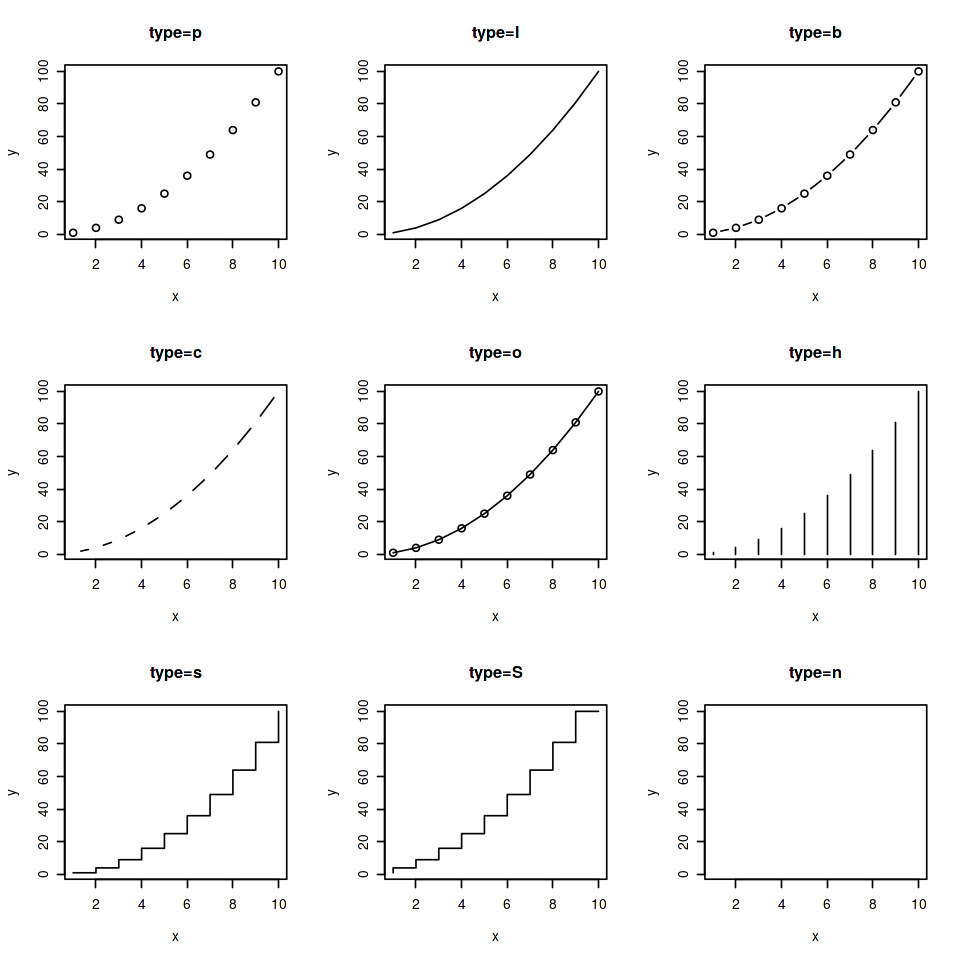

In [18]:
options(repr.plot.width=8, repr.plot.height=8)

oldPar=par()
par(mfrow=c(3,3))

x=1:10
y=x**2

for(dType in c("p","l",'b','c','o','h', 's','S','n')){
    plot(x, y, type=dType, 
         main=paste0("type=",dType) )
}

## pch=22 点的类型(0-25)

pch' values:
Values of pch are stored internally as integers. The interpretation is

NA_integer_: no symbol.

0:18: S-compatible vector symbols.

19:25: further R vector symbols.

26:31: unused (and ignored).

32:127: ASCII characters.

128:255 native characters only in a single-byte locale and for the symbol font. (128:159 are only used on Windows.)

-32 ... Unicode code point (where supported).


    pch = 19: solid circle,
    pch = 20: bullet (smaller solid circle, 2/3 the size of 19),
    pch = 21: filled circle,
    pch = 22: filled square,
    pch = 23: filled diamond,
    pch = 24: filled triangle point-up,
    pch = 25: filled triangle point down.

,y,x
,<int>,<int>
1,5,1
2,4,1


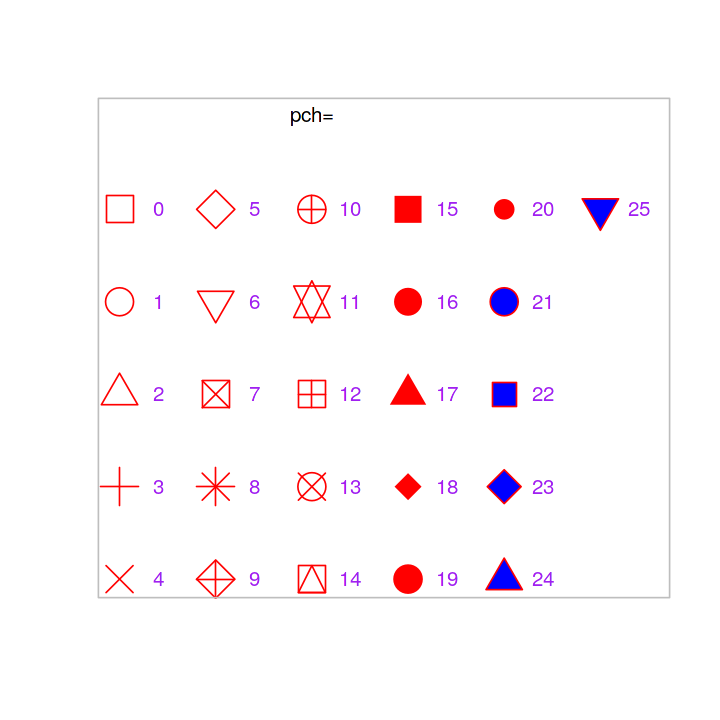

In [19]:
x=1:6
y=5:1

xy=expand.grid(y=y, x=x)
xy=head(xy, n=26)
head(xy, n=2)

options(repr.plot.width=6, repr.plot.height=6)
plot(xy$x, xy$y, xlim=c(1,6.5), ylim=c(1,6), #坐标轴范围
     pch=0:25,
     ann=F,# 隐藏xlab，ylab，main
     axes=F, # 隐藏坐标轴
     
     bg="blue", #填充，21-25有填充和描边； 15-20只有填充
     col="red", #颜色
     
     cex=3, #缩放倍数
    main="point ")

box(col="grey") #方框
text(3,6,"pch=") # 标题
text(xy$x+0.4, xy$y, as.character(0:25), col="purple") #数字

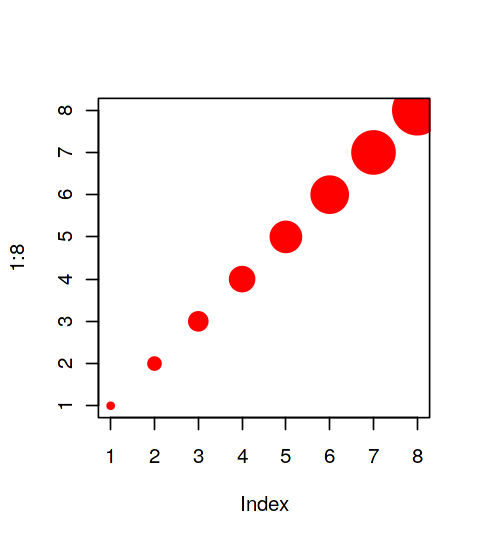

In [20]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:8, pch=20, 
     cex=1:8, col="red")

## lty=2 线类型(0-6)

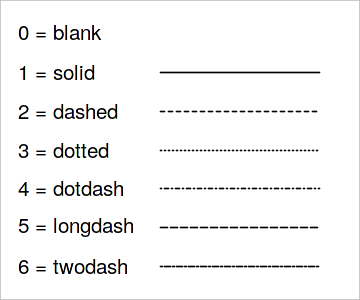

In [21]:
options(repr.plot.width=3, repr.plot.height=2.5)

par(mar=c(1,5,1,0))
plot(NULL, ann=F, axes=F, xlim=c(-1,6), ylim=c(0,6) )
#abline(h=0:6, lty=0:6, lwd=1)
box("figure", col="grey")

segments(0, 6:0, 5, 6:0,
         lty = 0:6, col = "black")

#text(2,6.5, "lty=",xpd=T)
#text(-0.5, 0:6, as.character(0:6), xpd=T, cex=1.5)

text(-4.5, 6:0, adj = 0, 
     xpd=T,
     labels = c("0 = blank", "1 = solid", "2 = dashed", "3 = dotted",
                "4 = dotdash", "5 = longdash", "6 = twodash"))

## col=坐标轴颜色

Warning message in plot.window(...):
“"col.ticks" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"col.ticks" is not a graphical parameter”
Warning message in box(...):
“"col.ticks" is not a graphical parameter”
Warning message in title(...):
“"col.ticks" is not a graphical parameter”


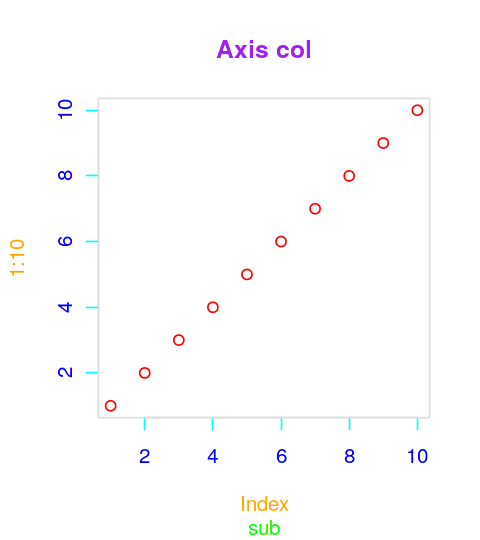

In [22]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, col='red',#点的颜色
     col.axis="blue",  #坐标轴 刻度值 的颜色
     col.lab="orange", #坐标轴 标签 的颜色
     
     col.main="purple", # main 标题的颜色
     col.sub="green", #sub 标题的颜色
     
     col.ticks="cyan", #虽然报错，但是真的管用
     
     
     fg="#dddddd", #前景色: 边框box，坐标轴axis刻度线
     bg="red", #背景色: 
     
     
     sub="sub",
    main="Axis col")

### 改变坐标轴刻度颜色

只能使用axis定制坐标轴了。

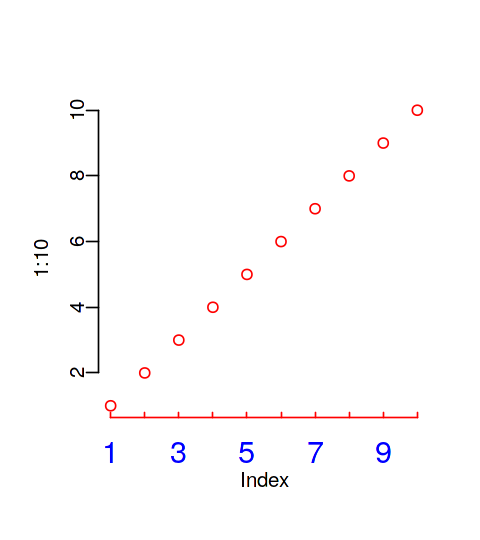

In [23]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, col='red', xaxt="n", mgp=c(2,0.5,0), bty="n")
axis(1, at=1:10, col="red", #刻度颜色
     tcl=0.2, #刻度向上
     
     mgp=c(0.5,1,0),
     
     col.axis="blue", #刻度文字颜色
     cex.axis=1.5 #颜色
    )

## cex=2 文本放大倍数

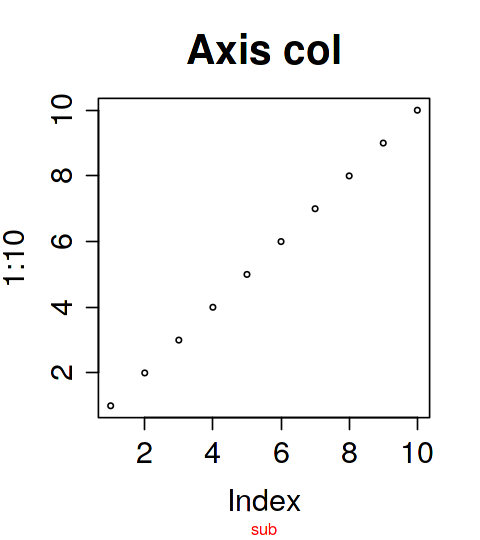

In [24]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, cex=0.5,#点
     cex.axis=1.5,  #坐标轴 刻度值
     cex.lab=1.5, #坐标轴 标签
     
     cex.main=2, # main 标题
     cex.sub=0.8, #sub 标题
     
     #fg="#dddddd", #前景色: 边框，坐标轴刻度线
     bg="blue", #背景色: ?
     
     sub="sub", col.sub="red",
    main="Axis col")

# 坐标轴

## axis 和ann参数

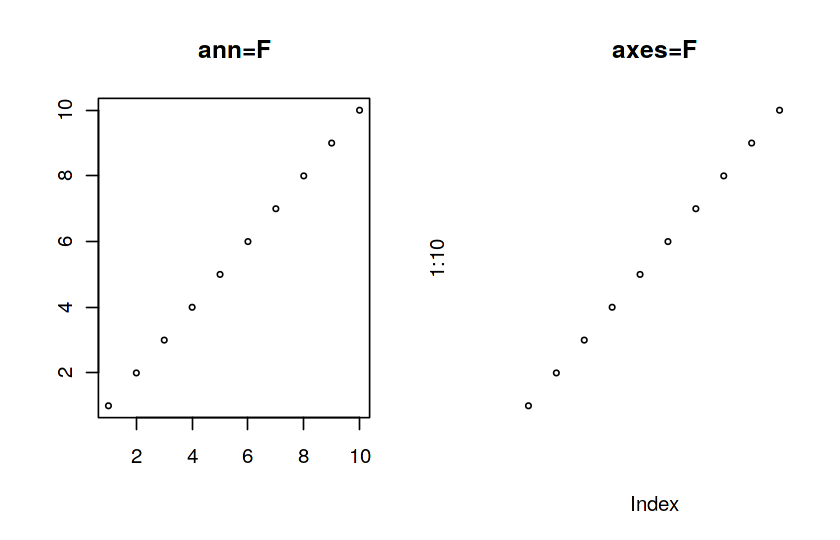

In [25]:
options(repr.plot.width=7, repr.plot.height=4.5)

par(mfrow=c(1,2))
plot(1:10, cex=0.5, ann=F)
title("ann=F")
#
plot(1:10, cex=0.5, axes=F)
title("axes=F")

## log尺度显示坐标轴

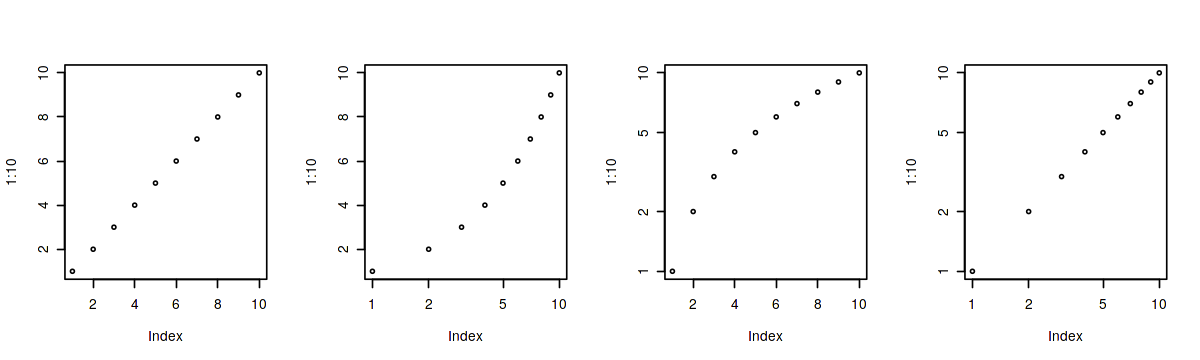

In [26]:
options(repr.plot.width=10, repr.plot.height=3)

par(mfrow=c(1,4))
plot(1:10, cex=0.5)

plot(1:10, cex=0.5, log="x")
plot(1:10, cex=0.5, log="y")
plot(1:10, cex=0.5, log="xy")


### 比较2种log画图的区别

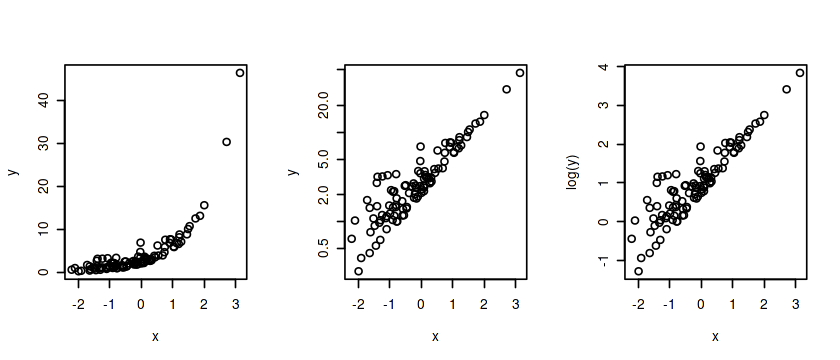

In [27]:
options(repr.plot.width=7, repr.plot.height=3)

par(mfrow=c(1,3))

set.seed(202103)

n=100
x <- rnorm(n)
y <- 2*exp(x) + rexp(n)

plot(x, y)            # y-scale,     y-scale-labels
plot(x, y, log = "y") # log-y-scale, y-scale-labels
plot(x, log(y))       # log-y-scale, log-y-scale labels

## box( which="plot" ) 画边框

which: character, one of "plot", "figure", "inner" and "outer".

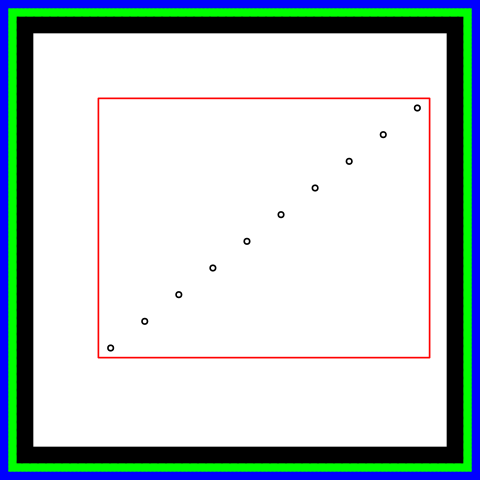

In [28]:
options(repr.plot.width=4, repr.plot.height=4)

plot(1:10, cex=0.5, ann=F, axes=F)
box( col='red') #默认是绘图区

box("inner", col='black', lwd=40) #inner 和 figure是并列的
box(which="figure", col='green', lty=2, lwd=20)

box("outer", col="blue", lty=3, lwd=10) #外边框，最外围
#如果没有设置 oma ，则 inner和outer是一致的

## bty=边框形状: 7种

Warning message in par(oldPar):
“graphical parameter "cin" cannot be set”
Warning message in par(oldPar):
“graphical parameter "cra" cannot be set”
Warning message in par(oldPar):
“graphical parameter "csi" cannot be set”
Warning message in par(oldPar):
“graphical parameter "cxy" cannot be set”
Warning message in par(oldPar):
“graphical parameter "din" cannot be set”
Warning message in par(oldPar):
“graphical parameter "page" cannot be set”


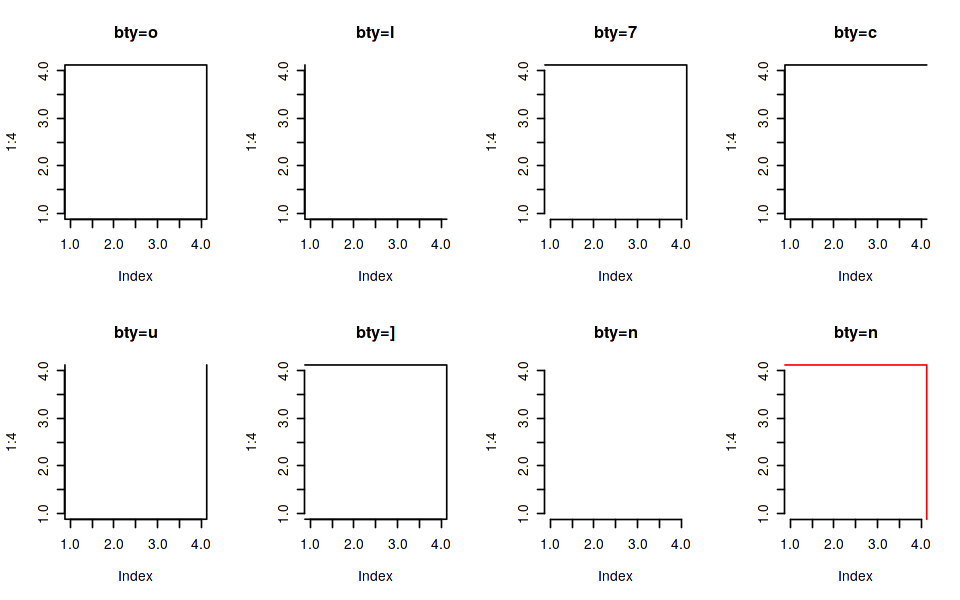

In [29]:
boxTypes=c("o", "l", "7", "c", "u", "]" , "n")

options(repr.plot.width=8, repr.plot.height=5)

par(mfrow=c(2,4))
for(i in boxTypes){
    plot(1:4, type="n", bty=i, main=paste0("bty=",i) )
}

plot(1:4, type="n", bty=i, main=paste0("bty=",i) )
box(col="red", bty="7")

par(oldPar)

## 坐标轴交点 pos

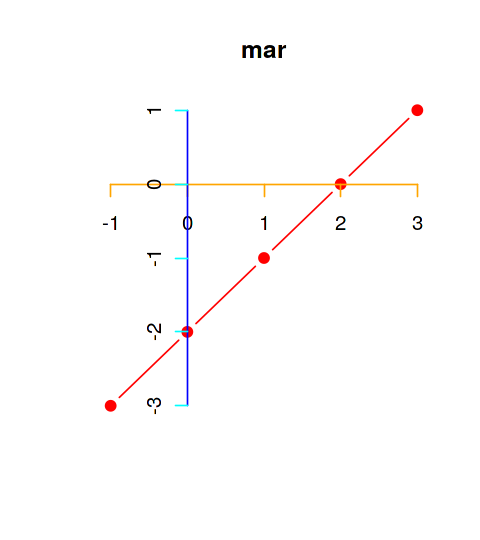

In [30]:
options(repr.plot.width=4, repr.plot.height=4.5)

x=(-1):3
y=(-3):1

plot( x,y, type="b", pch=16, col="red", cex=1.2,
     ann=F, axes=F)
title(main="mar")

axis(side=1, x, x, col="orange", pos=0)
axis(side=2, y, y, col="blue", pos=0, col.ticks="cyan")

## 坐标轴和刻度值的距离 padj=-1

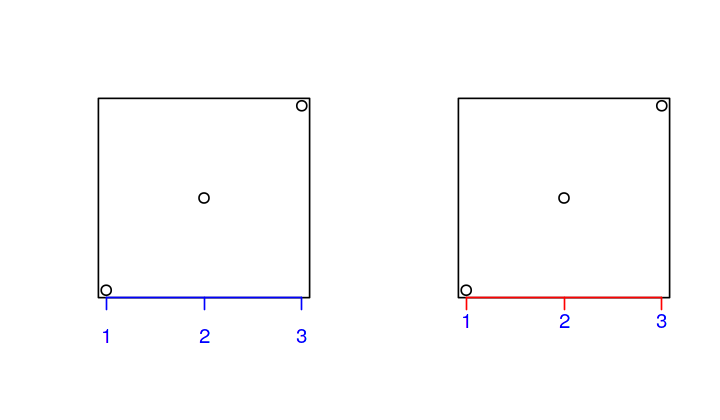

In [31]:
options(repr.plot.width=6, repr.plot.height=3.5)

par( mfrow=c(1,2) )

plot(1:3, main="mar", ylab="y", ann=F, xaxt="n", yaxt="n")
axis(1, 1:3, 1:3, col="blue", col.axis="blue")

plot(1:3, main="mar", ylab="y", ann=F, xaxt="n", yaxt="n")
axis(1, 1:3, 1:3, col="red", col.axis="blue",  padj=-1)

## hadj和padj调整刻度值的偏移

- hadj指将刻度值沿平行坐标轴方向调整的距离；
- padj指将刻度值沿垂直坐标轴方向调整的距离。

负值正向移动，正值负向移动。

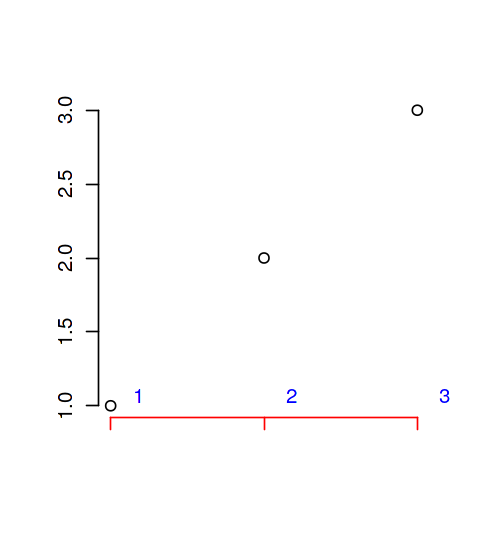

In [32]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:3, main="mar", ylab="y", ann=F, xaxt="n", bty="n")

axis(1, 1:3, 1:3, xpd=T,
     hadj=-2, #水平右移
     padj=-4, #垂直上移
    col="red", col.axis="blue")

## lwd.ticks 调整刻度粗细

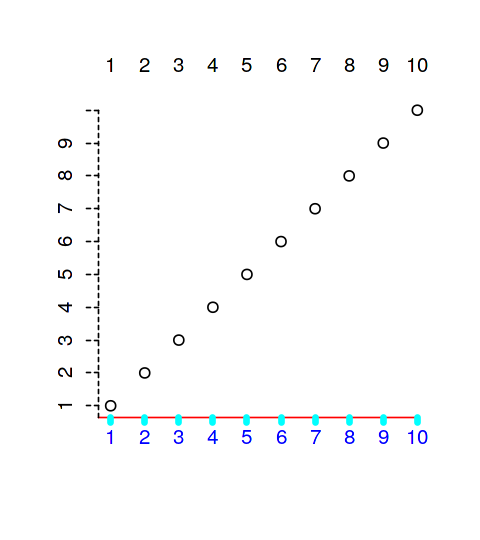

In [33]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, ann=F, axes=F)

axis(1,at=seq(0,10),labels=seq(0,10,1),cex.axis=1,
     mgp=c(2,0.2,0), #刻度值位置受到 mgp和 hadj/padj控制
     #padj=0,
     #las=2,
     
     col="red", #轴线颜色
     col.axis="blue", #刻度值颜色
     col.ticks="cyan", #刻度颜色
     tcl=-0.2, lwd.ticks=4) #刻度加粗
axis(2,at=seq(0,10),labels=seq(0,10,1),cex.axis=1,
     lty=2)

axis(3,at=seq(0,10),labels=seq(0,10,1),cex.axis=1, tick=F) #tick=F则不显示刻度

## 双坐标轴

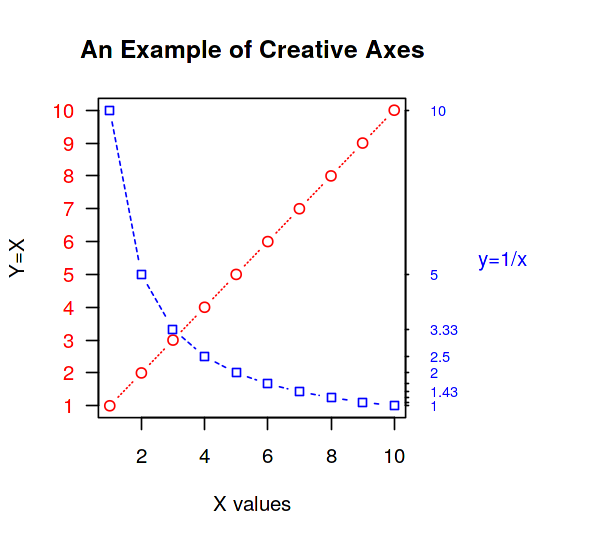

In [34]:
options(repr.plot.width=5, repr.plot.height=4.5)

x<-c(1:10)
y<-x
z<- 10/x

par(mar=c(5,4,4,8) + 0.1)
plot(x,y,type = "b", pch=21,col="red", yaxt="n",lty=3,ann=F) #不要y轴
lines(x,z,type = "b",pch=22,col="blue",lty=2)
#
axis(2,at=x,labels = x,col.axis="red",las=2) #左侧的轴 red
axis(4,at=z,labels=round(z,digits = 2), col.axis="blue",las=2,cex.axis=0.7,tck=-.01) #右侧的轴 blue

mtext("y=1/x",side = 4,line=3,cex.lab=1,las=2,col="blue")

title("An Example of Creative Axes",
      xlab = "X values",
      ylab = "Y=X")

# 图形边界

## 内边界 mar=默认值为c(5, 4, 4, 2) + 0.1

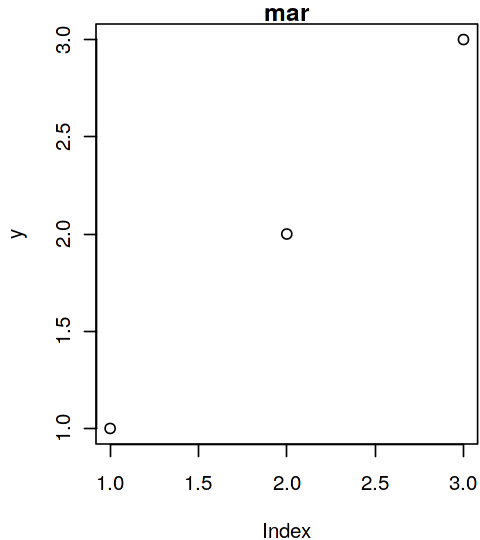

In [35]:
options(repr.plot.width=4, repr.plot.height=4.5)

par(mar=c(4,4,1,0.1)) #bottom,l,t,r, 
plot(1:3, main="mar", ylab="y")

## 外边界 oma=c(b, l, t, r)

### 添加文字：mtext() text()

Warning message in box("figure", col = "purple", ltp = 2, lwd = 1):
“"ltp" is not a graphical parameter”


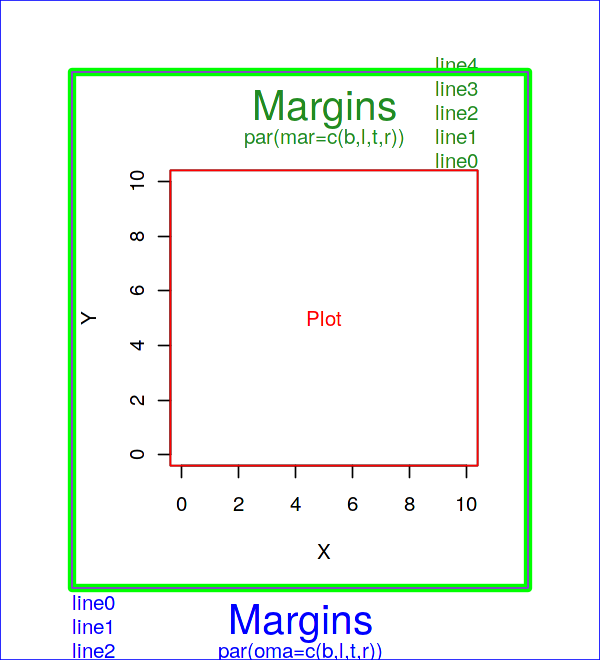

In [36]:
options(repr.plot.width=5, repr.plot.height=5.5)

par(oma=c(3,3,3,3), mar=c(5,4,4,2)+0.1)

plot(0:10, 0:10, type="n", xlab="X", ylab="Y")
text(5,5, "Plot", col='red') #in the middle
box("plot", col="red") #坐标轴围起来的区域

#margins
mtext("Margins", side=3, line=2, cex=2, col="forestgreen")
mtext("par(mar=c(b,l,t,r))", side=3, line=1, cex=1, col="forestgreen")
#
mtext("line0", side=3, line=0, cex=1, col="forestgreen", adj=1)
mtext("line1", side=3, line=1, cex=1, col="forestgreen", adj=1)
mtext("line2", side=3, line=2, cex=1, col="forestgreen", adj=1)
mtext("line3", side=3, line=3, cex=1, col="forestgreen", adj=1)
mtext("line4", side=3, line=4, cex=1, col="forestgreen", adj=1)
#
box("inner", col="green",lwd=5)
box("figure", col="purple",ltp=2, lwd=1)

# outer margins
mtext("Margins", side=1, line=1, cex=2, col="blue", outer=TRUE)
mtext("par(oma=c(b,l,t,r))", side=1, line=2, cex=1, col="blue",outer=TRUE)
#
mtext("line0", side=1, line=0, cex=1, col="blue", adj=0, outer=T)
mtext("line1", side=1, line=1, cex=1, col="blue", adj=0, outer=T)
mtext("line2", side=1, line=2, cex=1, col="blue", adj=0, outer=T)
#
box("outer", col="blue")

## 区分 inner 和 figure

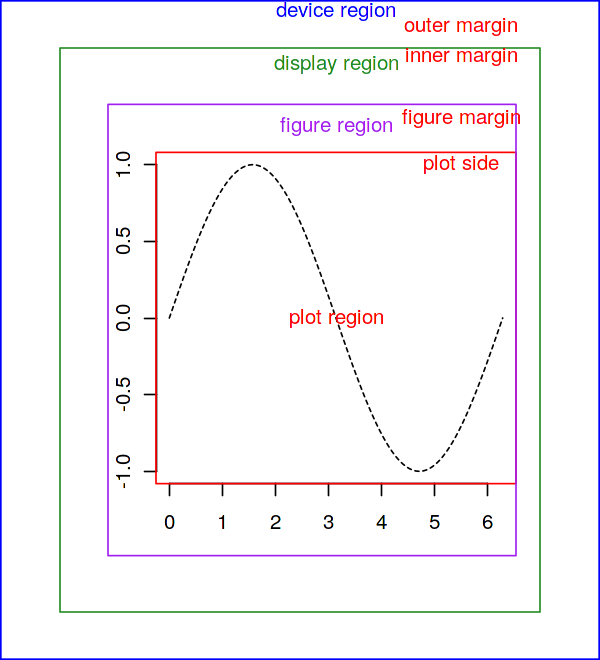

In [37]:
options(repr.plot.width=5, repr.plot.height=5.5)

par(oma = c(2, 2.5, 2, 2.5), mar = c(3, 2, 2, 0),
    fig = c(0.1, 0.95, 0.1, 0.9), xpd = NA)

plot(sin, 0, 2*pi, type = "l", lty=2, frame.plot = F, ann = F)
#
box("plot", col = "red")
box("figure", col = "purple")
box("inner", col = "forestgreen")
box("outer", col = "blue", lwd=2)
#
text(pi, 0, labels = "plot region", col="red")
text(pi, 1.25, labels = "figure region", col="purple")
text(pi, 1.65, labels = "display region", col="forestgreen")
text(pi, 2, labels = "device region", col="blue")
#
text(5.5, 1, labels = "plot side", col = "red")
text(5.5, 1.3, labels = "figure margin", col = "red")
text(5.5, 1.7, labels = "inner margin", col = "red")
text(5.5, 1.9, labels = "outer margin", col = "red")

以下参数用于设置各区域相对位置：

- omd：形式为c(x1, x2, y1, y2)，控制display region在device region的相对位置，各元素使用占比表示，如x1 = 0.1表示display region的左侧边框在device region边框长度的1/10处；
- fig：形式为c(x1, x2, y1, y2)，控制figure region在display region的相对位置，各元素使用占比表示；
- plt：形式为c(x1, x2, y1, y2)，控制plot region在figure region的相对位置，各元素使用占比表示；
- usr：控制plot region的坐标范围，形式为c(x1, x2, y1, y2)；若xlog或ylog为TRUE，则实际显示范围为10^usr；该参数只能在par()函数内设置。

# 文本: text(), mtext(), title()

## 字号控制 cex=，ps=

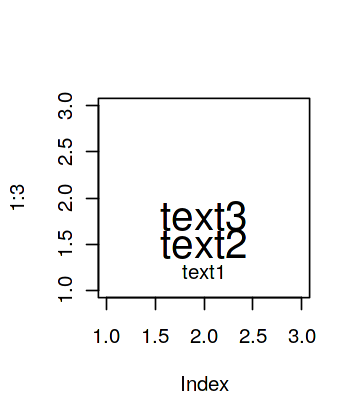

In [38]:
options(repr.plot.width=3, repr.plot.height=3.5)

plot(1:3, type="n")
text(2,1.2, "text1")
text(2,1.5, "text2", cex=2)
text(2,1.8, "text3", cex=2, ps="100") #ps 不起作用?

## 文本旋转弧度 srt=

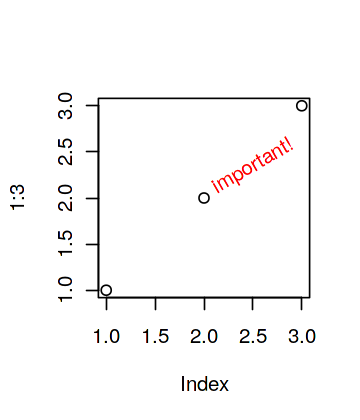

In [39]:
options(repr.plot.width=3, repr.plot.height=3.5)
#if(exists("oldPar")){ par(oldPar) }
plot(1:3)

text(2+0.1, 2+0.1, "important!", adj=0,
     srt=30, col="red")

## text() 控制文本方位 pos=

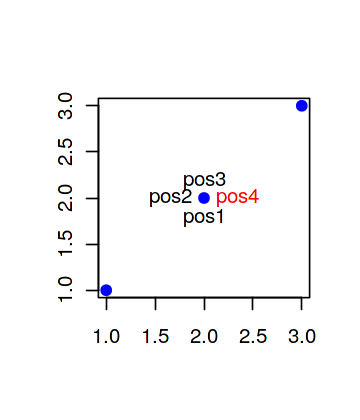

In [40]:
options(repr.plot.width=3, repr.plot.height=3.5)
plot(1:3, col="blue",bg='blue', pch=21, ann=F)

text(2, 2, "pos1", adj=0, pos=1)
text(2, 2, "pos2", adj=0, pos=2)
text(2, 2, "pos3", adj=0, pos=3)
text(2, 2, "pos4", adj=0, pos=4, col="red")

## offset=控制离开中心点距离

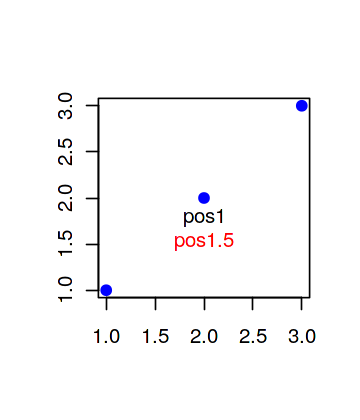

In [41]:
options(repr.plot.width=3, repr.plot.height=3.5)
plot(1:3, col="blue",bg='blue', pch=21, ann=F)

text(2, 2, "pos1", adj=0, pos=1)
text(2, 2, "pos1.5", adj=0, pos=1, offset=1.5, col="red")

### 实例: 文字标注图中的点

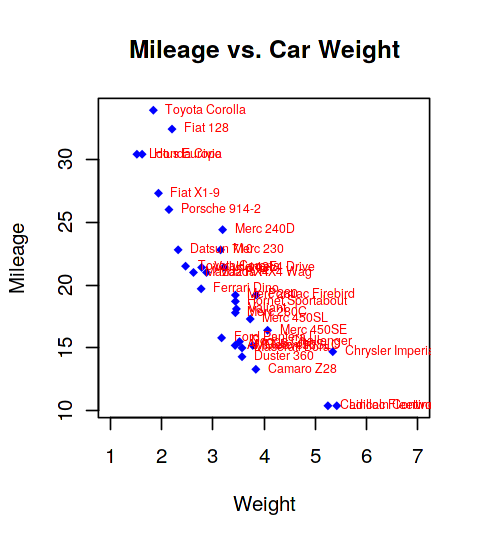

In [42]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(mtcars$wt,mtcars$mpg,
     main="Mileage vs. Car Weight",
     xlab = "Weight",ylab = "Mileage",
     xlim=c(1,7),
     pch=18,col="blue")
text(mtcars$wt,mtcars$mpg,
     row.names(mtcars),
     cex = .6,pos = 4,col = "red")

## mtext

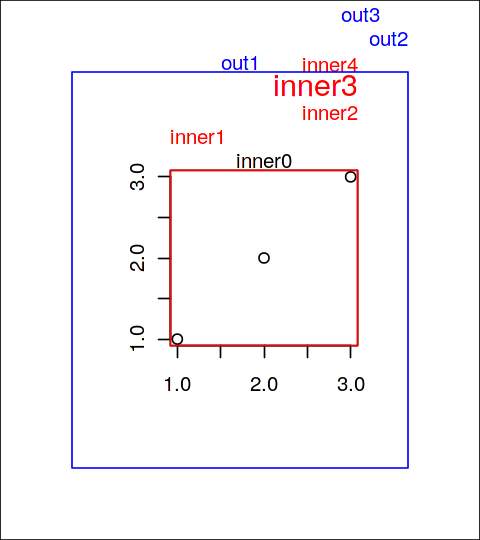

In [43]:
options(repr.plot.width=4, repr.plot.height=4.5)

par(oma=c(3,3,3,3), mar=c(5,4,4,2)+0.1)
plot(1:3, ann=F)
#
box("plot", col='red')
mtext("inner0", side=3, line=0)
mtext("inner1", side=3, line=1, col='red', adj=0) #左对齐 adj=0
mtext("inner2", side=3, line=2, col='red', adj=1) #右对齐 adj=1
mtext("inner3", side=3, line=3, col='red', adj=1, cex=1.5) #放大 cex
mtext("inner4", side=3, line=4, col='red', adj=1, cex=1, srt=30) #旋转30度,失败，可能srt只用于text()
#
box("figure", col='blue')
mtext("out1", side=3, line=0, col='blue', outer=T) #显示到外区 outer margin
mtext("out2", side=3, line=1, col='blue', outer=T, adj=1)
mtext("out3", side=3, line=2, col='blue', outer=T, adj=0, at=0.8) #定位到80%位置at

#
box("outer", col='black')

## 公式与表达式 expression()

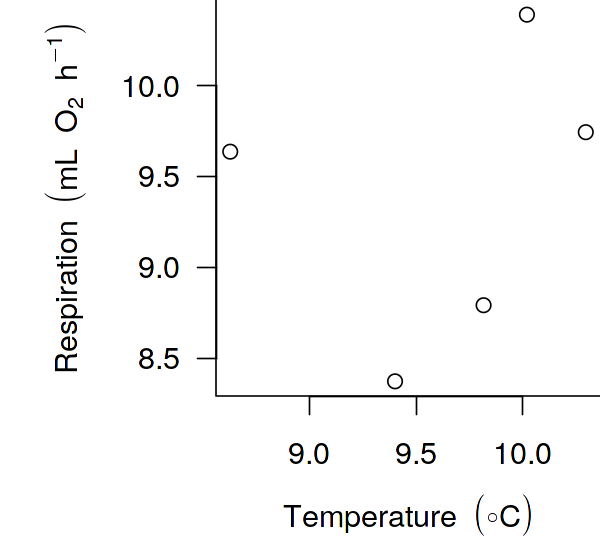

In [44]:
# 坐标标签中的公式
options(repr.plot.width=5, repr.plot.height=4.5)

# plot two series of random data
par(mar=c(4,6,0,0), cex=1.5, cex.lab=1.2)
set.seed(10)
X<-rnorm(5,10,1)
Y<-rnorm(5,10,1)

plot(X,Y,type="p",axes=T, ann=F, bty="l", las=1)

mtext(expression(Temperature~(degree*C)),1, line=3, cex=1.5)
mtext(expression(Respiration~(mL~O[2]~h^-1)),2, line=3.5, cex=1.5)

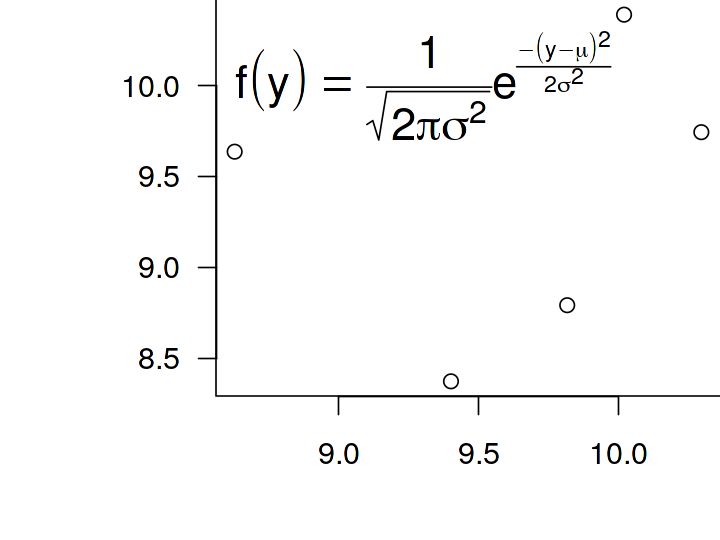

In [45]:
# 图中显示公式
options(repr.plot.width=6, repr.plot.height=4.5)

# plot two series of random data
par(mar=c(4,6,0,0), cex=1.5, cex.lab=1.2)
set.seed(10)
X<-rnorm(5,10,1)
Y<-rnorm(5,10,1)

plot(X,Y,type="p",axes=T, ann=F, bty="l", las=1)

text(9.3,10,expression(f(y) == frac(1,sqrt(2*pi*sigma^2))*e^frac(-(y-mu)^2,2*sigma^2)), cex=1.5) #公式

# 图例 legend

legend(x, y = NULL, legend, fill = NULL, col = par("col"), lty, lwd, pch, angle = 45, density = NULL, bty = "o", bg = par("bg"), box.lwd = par("lwd"), box.lty = par("lty"), pt.bg = NA, cex = 1, pt.cex = cex, pt.lwd = lwd, xjust = 0, yjust = 1, x.intersp = 1, y.intersp = 1, adj = c(0, 0.5), text.width = NULL, text.col = par("col"), merge = do.lines && has.pch, trace = FALSE, plot = TRUE, ncol = 1, horiz = FALSE, title = NULL, inset = 0)

位置可以是坐标，也可以是方位词。
("bottomleft", "bottomright", "topleft", "topright") and boundaries ("bottom", "left", "top", "right")

## 竖着显示图例

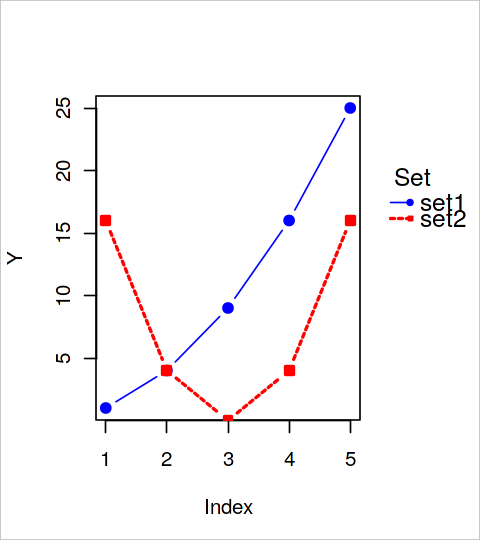

In [46]:
options(repr.plot.width=4, repr.plot.height=4.5)

par(mar=c(5,4,4,5))
plot( (1:5)**2, type="b", col="blue",bg='blue', pch=21, ylab="Y", lwd=1)
lines( ((1:5)-3)**2 *4, type="b", col="red",bg='red', pch=22, lty=2, lwd=2)

box("outer",col='grey')
legend(5.5, 20, legend=c("set1","set2"), col=c('blue', 'red'), lwd=c(1,2), pt.bg=c("blue",'red'), #点的填充
       pch=c(21,22), lty=c(1,2), merge=F,
       xpd=T, #可显示外部
       adj=0, #左对齐
      
       bty="n",#不要外边框
       bg="red",#bty="n"时无效
       
       text.col="black", #图例文字颜色
       
       
       # horiz=T, #横着展示
       ncol=1, # 每列几个
       
       cex=1.2, #放大字体
       
       pt.cex=0.5, #放大点
       pt.lwd=1.2, #线粗细

      title="Set") #图例标题

## 图例的小方框:距离、颜色、间距

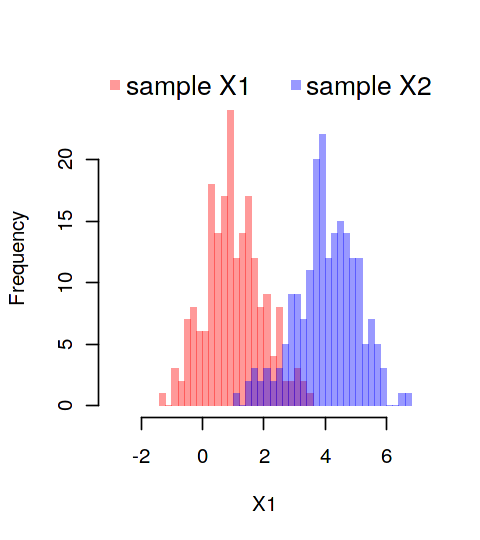

In [47]:
options(repr.plot.width=4, repr.plot.height=4.5)

set.seed(1)
X1=rnorm(200, 1,1)
X2=rnorm(200, 4,1)

hist(X1, col="#FF000066", n=20, border=NA, xlim=c(-3,7), main="")
hist(X2, col="#0000FF66", n=20, border=NA, add=T)

legend( x=par("usr")[1], y=par("usr")[4]+2.5, legend=c("sample X1","sample X2"),
       xpd=T, horiz=T,
       
       bty="n",
       
       x.intersp=0.5, #图形和文字的x距离
       #y.intersp=3, #图形之间的y距离，高度差(这里没作用)
       
       text.width=5, #两个图例之间的距离
       
       border=NA, #不要图例小方块描边
       cex=1.3,
       
       fill=c("#FF000066", "#0000FF66")  )

## xjust, yjust

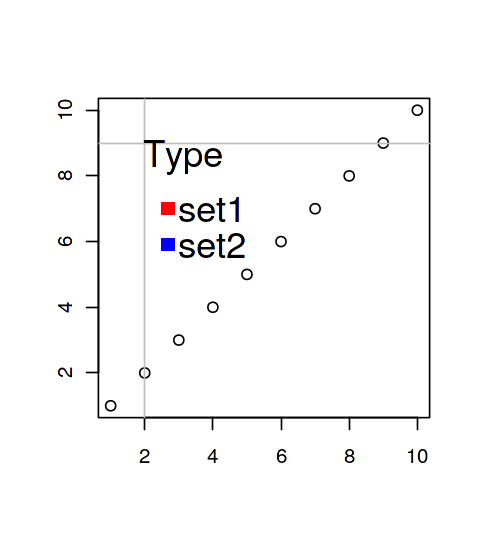

In [48]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, ann=F)
abline(v=2, h=9, col='grey')

legend(2,9, legend=c("set1", 'set2'), title = "Type",
       fill=c('red','blue'), border=NA,
       
       x.intersp=0.2, y.intersp=1.5, #小盒宽高
       #horiz=T,text.width=3,
       #text.height=3,
       xpd=T,
       cex=1.8,
       
       xjust=0,
       yjust=1,

       bty='n')

## 边框坐标定位 par("usr")

[1] 0.568 1.432 0.568 1.432


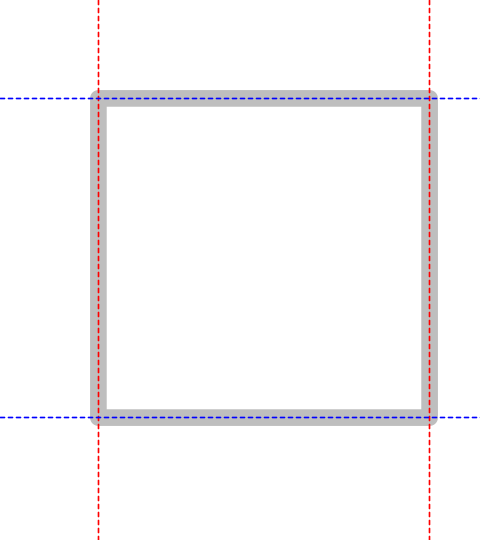

In [49]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1, ann=F, axes=F, type="n")
box(col="grey", lwd=10)
#
Pos=par("usr")
print(Pos)# x1,x2,  y1,y2

abline(v=Pos[1:2], col='red',lty=2, xpd=T)
abline(h=Pos[3:4], col='blue',lty=2, xpd=T)

# axis() 坐标轴

axis(side, at = NULL, labels = TRUE, tick = TRUE, line = NA,  
     pos = NA, outer = FALSE, font = NA, lty = "solid",  
     lwd = 1, lwd.ticks = lwd, col = NULL, col.ticks = NULL,  
     hadj = NA, padj = NA, gap.axis = NA, ...)

## yaxt="n" 不显示坐标轴

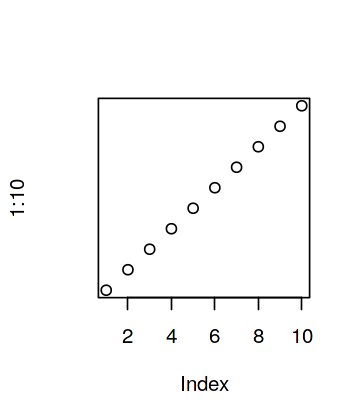

In [50]:
options(repr.plot.width=3, repr.plot.height=3.5)
plot(1:10, bty="o", yaxt="n" )

## xaxs="i" 图和轴之间不留空隙

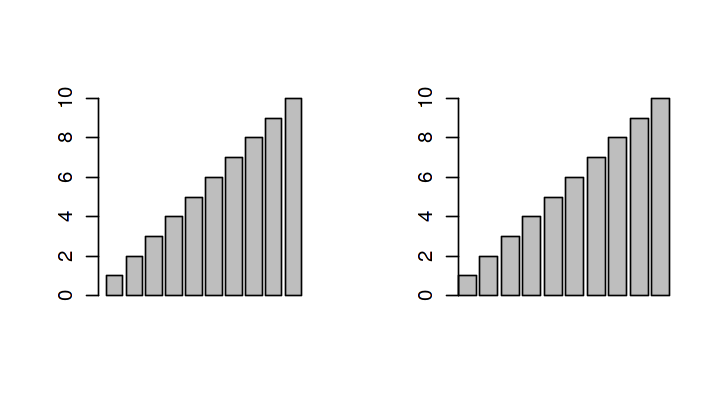

In [51]:
options(repr.plot.width=6, repr.plot.height=3.5)
par(mfrow=c(1,2))
barplot(1:10, xaxs="r" )
barplot(1:10, xaxs="i" )

## 自定义坐标轴

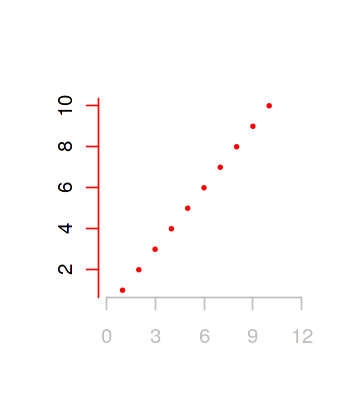

In [52]:
options(repr.plot.width=3, repr.plot.height=3.5)
plot(1:10, axes=F, ann=F, xlim=c(0,12), cex=0.5, 
     col=NA, bg="red", pch=21)

axis(side=1, at=seq(0,12,3), las=1, col='grey', col.axis="grey")
axis(side=2, at=seq(0,12,2), las=3, col='red')

##  mgp=c(title,labels,line)

mgp=c(3, 1, 0) 三个坐标成分的位置.
- 第一个参数是轴标签相对轴位置的距离,以文本行作为参照单位的.
- 第二个参数表示刻度标记的距离,
- 最后一个参数是轴位置到轴线的距离(常常是0).

正值表示在图形外,负值表示在图形内

In [53]:
par("mgp")

[1] 3 1 0

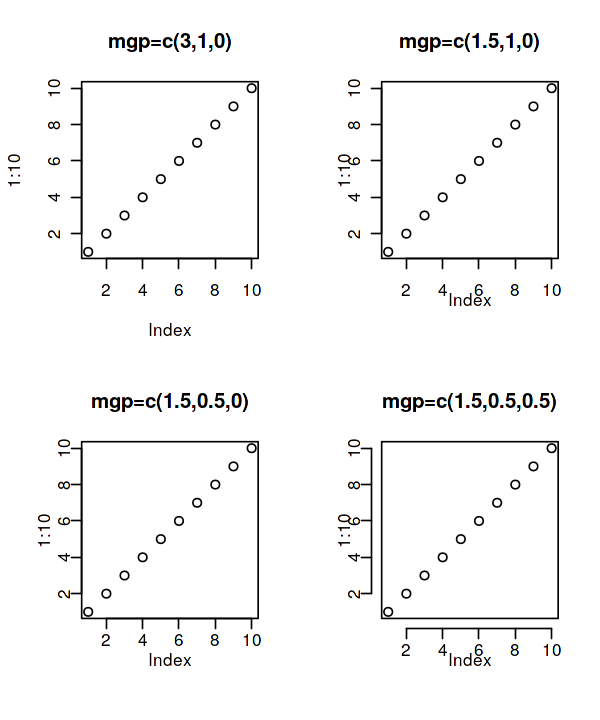

In [54]:
options(repr.plot.width=5, repr.plot.height=6)
par(mfrow=c(2,2))
plot(1:10, main="mgp=c(3,1,0)" )
plot(1:10, mgp=c(1.5,1,0), main="mgp=c(1.5,1,0)" )

plot(1:10, mgp=c(1.5,0.5,0), main="mgp=c(1.5,0.5,0)" )
plot(1:10, mgp=c(1.5,0.5, 0.5), main="mgp=c(1.5,0.5,0.5)" )

#par(oldPar)

## tck,tcl 刻度线长度

tck,tcl	=length	The length of tick marks as a fraction of the plot dimensions (tck) and as a fraction of the height of a line of text (tcl)

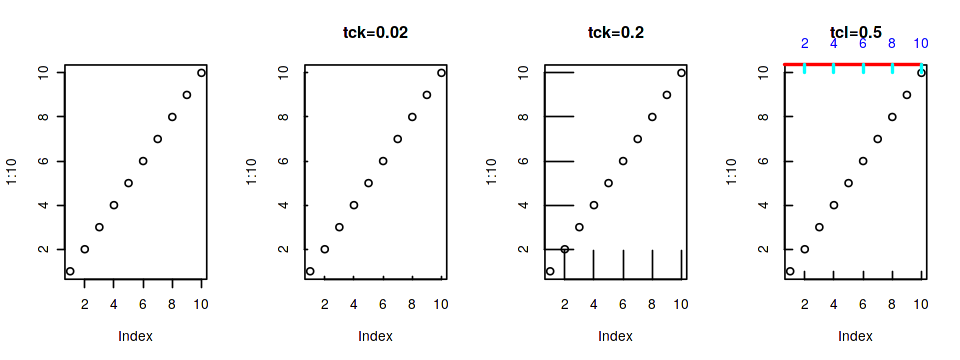

In [55]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,4))
plot(1:10 )
plot(1:10, tck=0.02, main="tck=0.02")
plot(1:10, tck=0.2, main="tck=0.2") #tck 刻度和长宽高度比

plot(1:10, tcl=0.5, main="tcl=0.5") #tcl 刻度和字体高度比
axis(3, seq(0,10,2), seq(0,10,2), lwd=2, col="red", col.axis="blue", col.ticks="cyan", tcl=0.5) #正向内，负向外

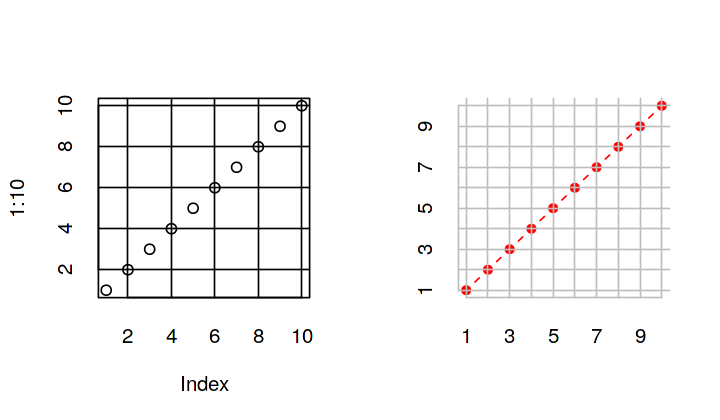

In [56]:
# tck=1时,给出网格线.
options(repr.plot.width=6, repr.plot.height=3.5)

par(mfrow=c(1,2))
plot(1:10, tck=1)

plot(1:10, type="b", axes=F, ann=F, col='red', pch=16)
axis(1, 1:10, 1:10, tck=1, col="grey")
axis(2, 1:10, 1:10, tck=1, col="grey")

## xaxp,yaxp 刻度数量

xaxp,yaxp	=c(min,max,num)	Minimum, maximum and number of tick marks on the x and y axes

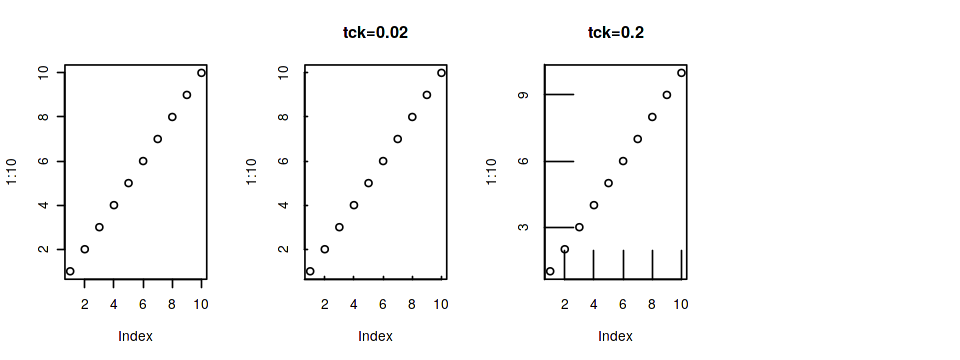

In [57]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,4))
plot(1:10 )
plot(1:10, tck=0.02, main="tck=0.02", xaxp=c(0,10,5))# 0-10之间，分成5份
plot(1:10, tck=0.2, main="tck=0.2",yaxp=c(0,12,4)) #0-12之间，分成4份

### 显示部分坐标轴，2套坐标刻度

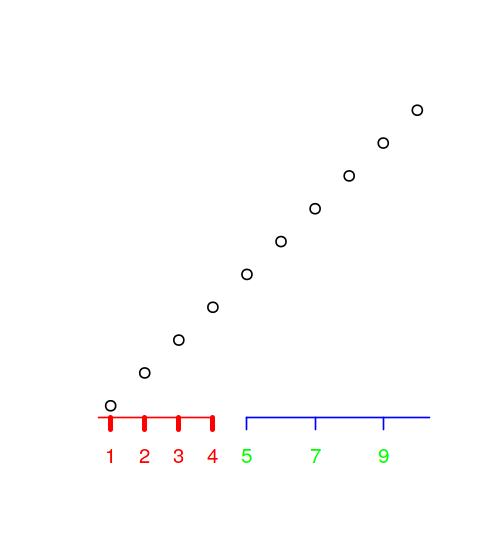

In [58]:
options(repr.plot.width=4, repr.plot.height=4.5)

plot(1:10, ann=F, axes=F )

axis(1, xaxp=c(0,4,4), col="red", col.axis='red', lwd.ticks=3)
axis(1, xaxp=c(5,11,3), col="blue", col.axis="green")

# 多图组合

## mfrow=c(), mfcol=c()简单组合

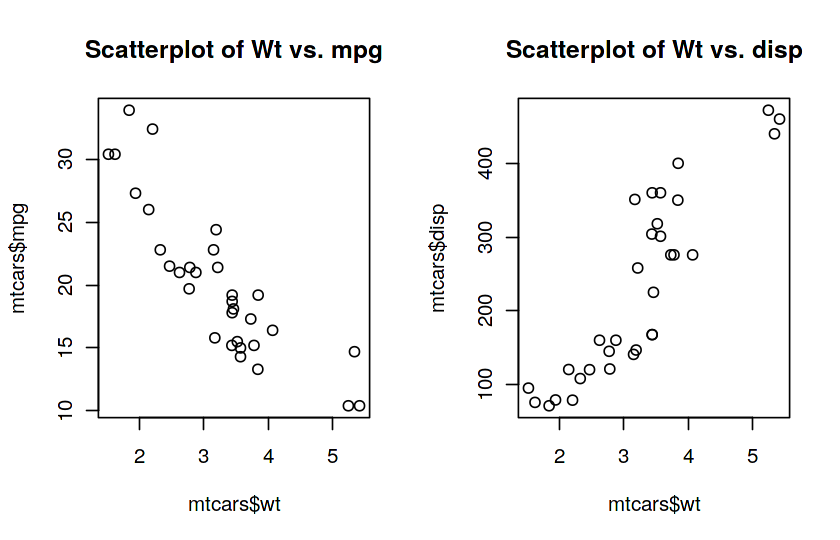

In [59]:
options(repr.plot.width=7, repr.plot.height=4.5)

par(mfrow=c(1,2))
plot(mtcars$wt,mtcars$mpg,main="Scatterplot of Wt vs. mpg")
plot(mtcars$wt,mtcars$disp,main="Scatterplot of Wt vs. disp")

## layout(matrix=c()) 更精细布局

In [60]:
matrix(c(1,1,2,3),2,2,byrow = T)
# 矩阵向量内容为各位置的图形编号；矩阵确定位置，矩阵数字编号与出图顺序一一对应

1,1
2,3


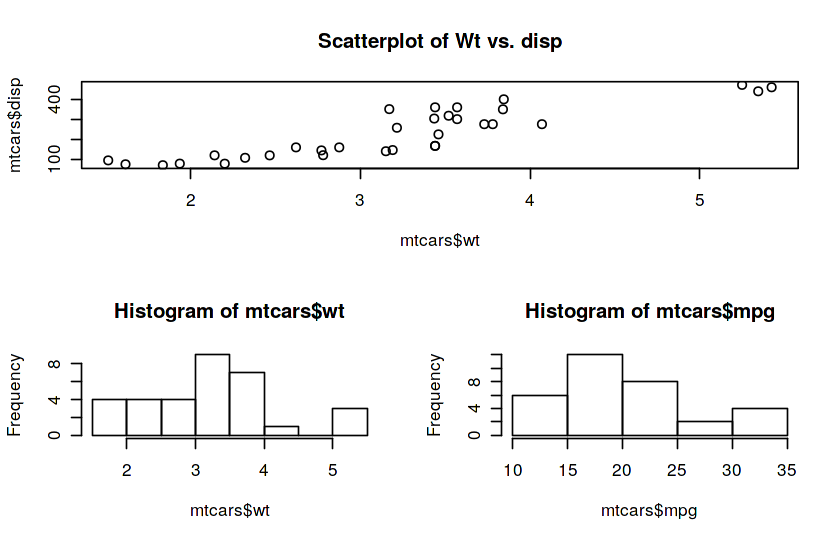

In [61]:
options(repr.plot.width=7, repr.plot.height=4.5)

layout(matrix(c(1,1,2,3),2,2,byrow = T))

plot(mtcars$wt,mtcars$disp,main="Scatterplot of Wt vs. disp")
hist(mtcars$wt)
hist(mtcars$mpg)

### 指定宽高比例 widths=, heights=

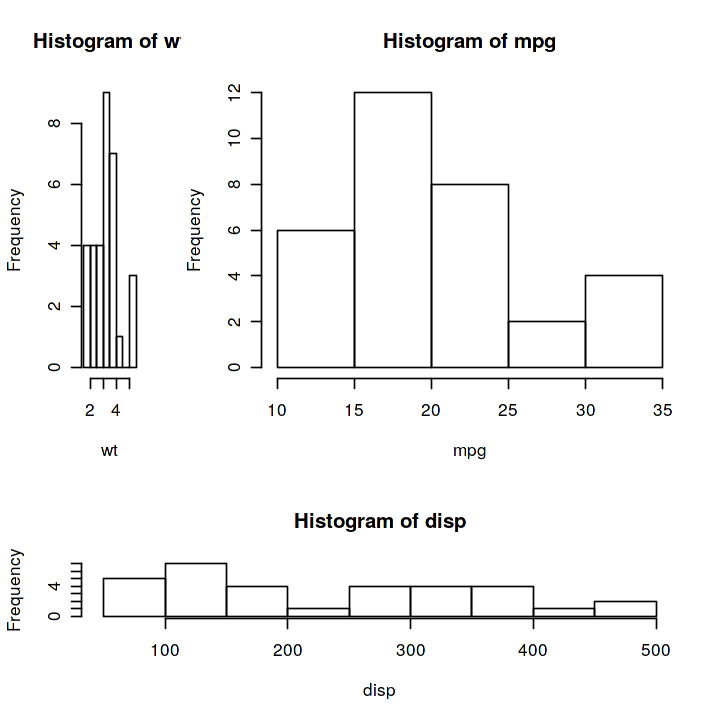

In [62]:
options(repr.plot.width=6, repr.plot.height=6)
# 对行/列占具最大位置数的图形，参数不起作用；以全局为准。

attach(mtcars)
layout(matrix(c(1,2,3,3),2,2,byrow = T), 
       widths = c(1,3),  #宽度比 1:3
       heights = c(2,1)) #高度比 2:1
hist(wt)
hist(mpg)
hist(disp)
detach(mtcars)

## 自由嵌套 fig=c(), new=T

fig=c(x1,x2, y1,y2) #都是比例 [0,1]

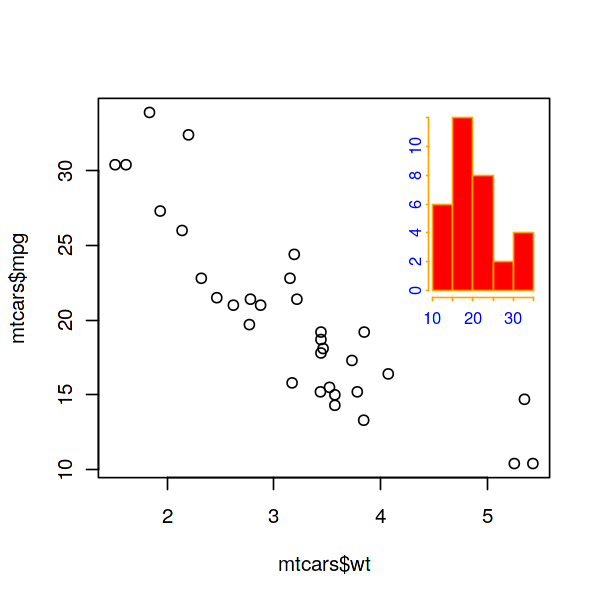

In [63]:
options(repr.plot.width=5, repr.plot.height=5)

plot(mtcars$wt,mtcars$mpg)

par(fig=c(0.55,0.98,  0.3,0.98), new=T) #fig=会新建图层，所以在原布局画图需要添加 new=T参数
hist(mtcars$mpg, ann=F, col="red", border = "orange", fg="orange", 
     cex.axis=0.8,
     mgp=c(1,0.2,0), #刻度值 和轴距离
     tcl=-0.1, #刻度线长度
     col.axis="blue")

## 实例2: 拼接plot+hist

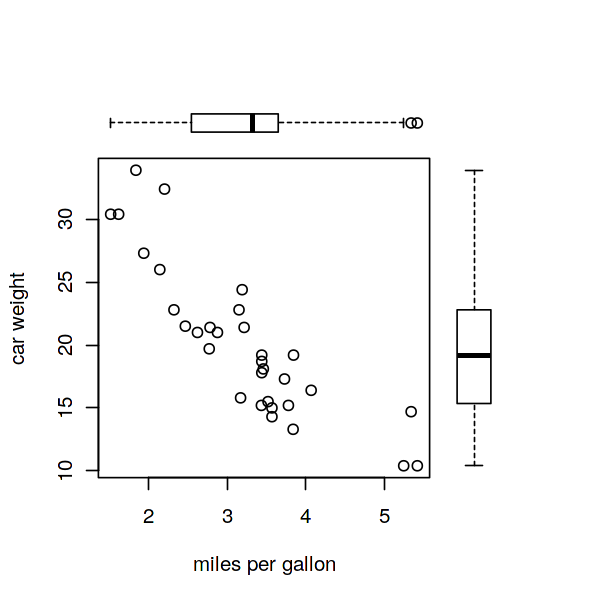

In [64]:
options(repr.plot.width=5, repr.plot.height=5)

par(fig =c(0,0.8,0,0.9)) #主图
plot(mtcars$wt,mtcars$mpg,
     xlab="miles per gallon",
     ylab = "car weight")

par(fig=c(0,0.8,0.55,1),new=T) #顶部
boxplot(mtcars$wt,horizontal = T,axes=F)

par(fig=c(0.55,0.95, 0,0.9),new=T) #右侧
boxplot(mtcars$mpg,axes=F)

# 图层拼合

- 高级函数和低级函数结合。
- 或者高级函数设置 add=T, or par(new=T)

## add=T

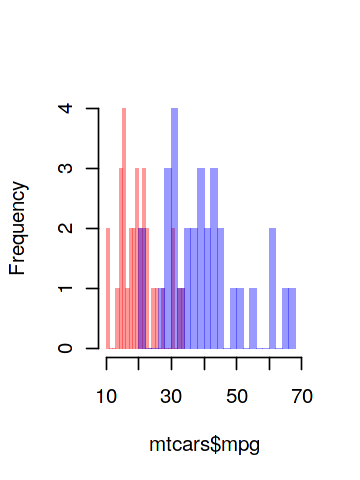

In [65]:
options(repr.plot.width=3, repr.plot.height=4)

hist(mtcars$mpg, col="#FF000066", n=20, border=NA, xlim=c(10,70), main="")
hist(mtcars$mpg*2, col="#0000FF66", n=20, border=NA, add=T)

## par(new=T)

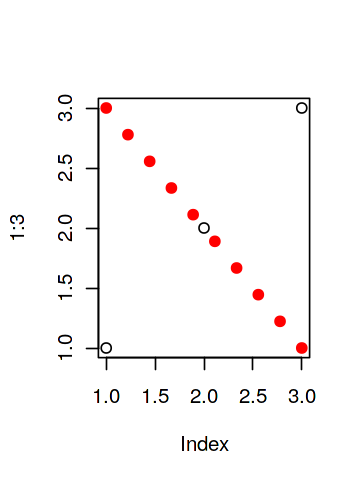

In [66]:
options(repr.plot.width=3, repr.plot.height=4)

plot(1:3)

par(new=T)
plot( seq(1,3, length.out = 10), seq(10,1,-1)/33, col='red', pch=19,
     ann=F, axes=F)

## 实例

### 点图+回归曲线

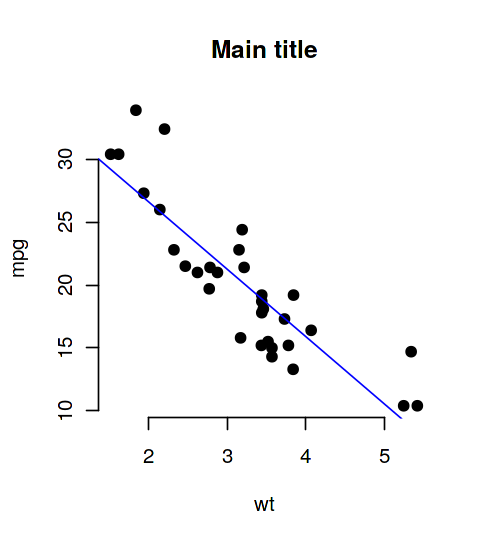

In [67]:
options(repr.plot.width=4, repr.plot.height=4.5)

x <- mtcars$wt
y <- mtcars$mpg
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Main title",
     xlab = "wt", ylab = "mpg",
     pch = 19, frame = FALSE)
# Add regression line
abline(lm(y ~ x, data = mtcars), col = "blue")

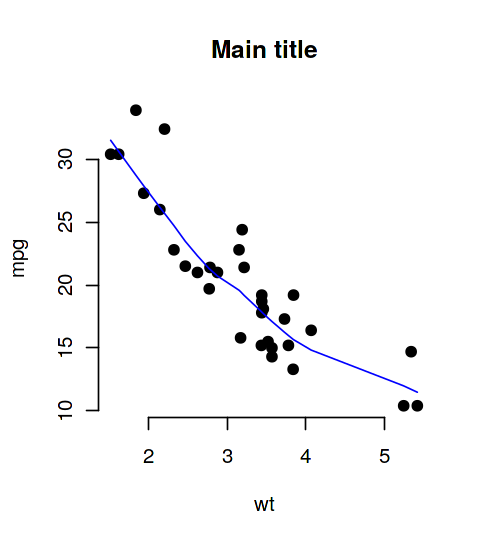

In [68]:
options(repr.plot.width=4, repr.plot.height=4.5)

# Add loess fit
plot(x, y, main = "Main title",
     xlab = "wt", ylab = "mpg",
     pch = 19, frame = FALSE)
lines(lowess(x, y), col = "blue")

### 气泡图

red,106
green,90
blue,205


[1] "#6A5ACD50"

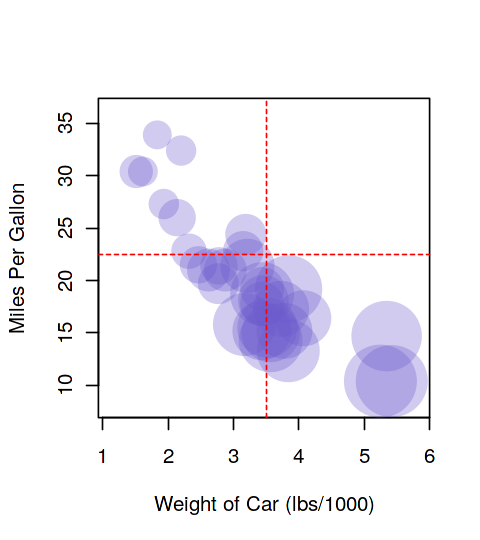

In [69]:
options(repr.plot.width=4, repr.plot.height=4.5)

dt=mtcars

# 面积等于大小，则根据大小求半径
dt$r=sqrt(dt$disp/pi)

col2rgb("slateblue")
#生成半透明的颜色；
col = rgb(106, 90, 205, 80, maxColorValue=255)
col

# 绘制常规气泡图；
symbols(dt$wt, dt$mpg, circle=dt$r, inches=0.30,
        fg=NA, bg=col,
        main="",
        ylab="Miles Per Gallon",
        xlab="Weight of Car (lbs/1000)")
#添加辅助线；
abline(h=22.5,v=3.5,col="red",lty=2)

### hist+density

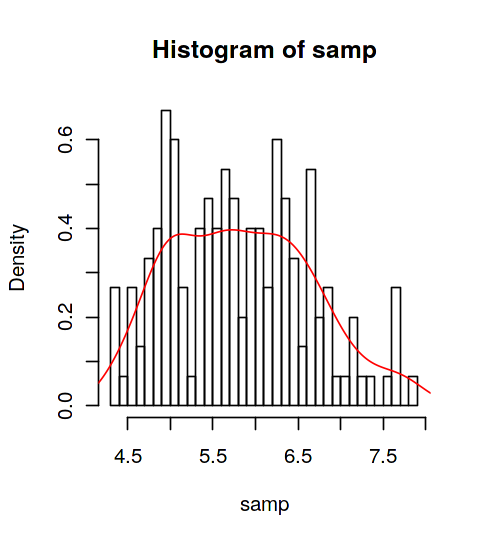

In [70]:
options(repr.plot.width=4, repr.plot.height=4.5)

samp=iris$Sepal.Length

hist(samp,n=30,prob=T)
lines(density(samp), col='red')

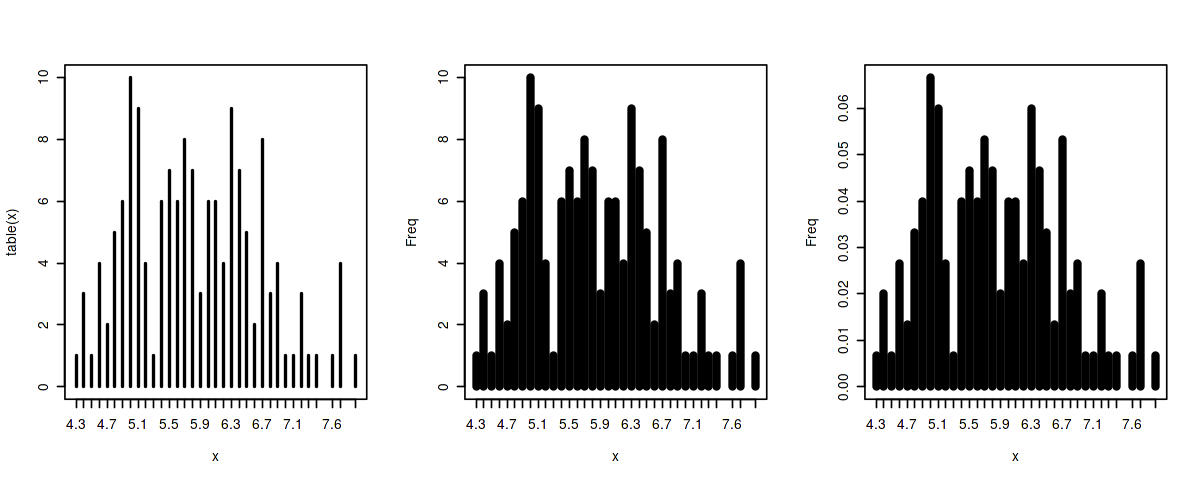

In [71]:
options(repr.plot.width=10, repr.plot.height=4)

par(mfrow=c(1,3))
x=iris$Sepal.Length

plot(table(x),type = "h")
plot(table(x),type="h",lwd=5,ylab = "Freq")
plot(table(x)/length(x),type="h",lwd=5,ylab = "Freq")#有相对频率的直方图，而不是计数

### barplot()+errorbar()

,mean,sd,species
,<dbl>,<dbl>,<fct>
setosa,5.006,0.3524897,setosa
versicolor,5.936,0.5161711,versicolor
virginica,6.588,0.6358796,virginica


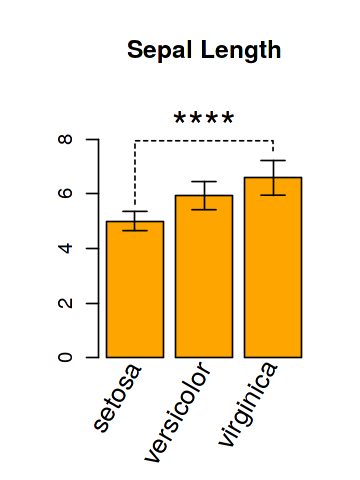

In [72]:
##############
# step1: 准备数据
##############
dat1=sapply( split(iris[,1:4], iris[,5]), function(x){
    apply(x, 2, mean)
} )
#dat1
dat2=sapply( split(iris[,1:4], iris[,5]), function(x){
    apply(x, 2, sd)
} )
#dat2

dat=data.frame(
    mean=dat1[1,],
    sd=dat2[1,],
    species=colnames(dat1)
)
dat


##############
# step2: plot
##############
options(repr.plot.width=3, repr.plot.height=4)
# 主图
posX=barplot(dat$mean, names = dat$species, col="orange", yaxs='i', #xaxs='i', 
             ylim=c(0,9.5), xlab="", xaxt="n", main="Sepal Length")

#底部文字
text(posX, -0.2, labels=dat$species, xpd=T, srt=60, adj=1, cex=1.3)

# 画error bar
dat$up=dat$mean+dat$sd
dat$down=dat$mean-dat$sd
for(i in 1:nrow(dat)){
    arrows(posX[i], dat$mean[i], posX[i], dat$up[i], angle = 90, length=0.1)
    arrows(posX[i], dat$mean[i], posX[i], dat$down[i], angle = 90, length=0.1)
}

# 显著性
b=posX
lines( x = c(b[1], b[1], b[3], b[3]), 
      y = c( dat$up[1] * 1.05 , dat$up[3] * 1.1,  dat$up[3] * 1.1, dat$up[3] * 1.05), 
      lty = 2)
text( x = b[1] + (b[3] - b[1]) / 2, 
     y = dat$up[3] * 1.1, label = "****", cex = 2, adj = c(0.5, 0))